# El ninõs project 

*El Niño is the warm phase of the El Niño–Southern Oscillation and is associated with a band of warm ocean water that develops in the central and east-central equatorial Pacific, including the area off the Pacific coast of South America.
(Wikipedia)*

*During normal conditions in the Pacific ocean, trade winds blow west along the equator, taking warm water from South America towards Asia. To replace that warm water, cold water rises from the depths — a process called upwelling. El Niño and La Niña are two opposing climate patterns that break these normal conditions. Scientists call these phenomena the El Niño-Southern Oscillation (ENSO) cycle. El Niño and La Niña can both have global impacts on weather, wildfires, ecosystems, and economies. Episodes of El Niño and La Niña typically last nine to 12 months, but can sometimes last for years. El Niño and La Niña events occur every two to seven years, on average, but they don’t occur on a regular schedule. Generally, El Niño occurs more frequently than La Niña.
(https://oceanservice.noaa.gov/facts/ninonina.html)*

We will use the el ninõ database to try to infer the frequency of this phenomenon.
Observation of the time series anomaly fluctuation, the idea is to build and general overview, to extract pieces of information. To do that, we need to apply some methods in python language. 

#### Questions to answer:

    (1) Is there some correlation of time-series in the month scale?
    (2) We can use the autocorrelation to estimate the interval between two events?

In [1]:
## Some libraries that we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
#from pandas.plotting import scatter_matrix
from pandas import read_csv
from pandas import DataFrame
import scipy.stats as stats

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
data = pd.read_csv('/home/maike/Documents/ICTP/ninos.txt', sep = "   ", header = None)

# Looking to data shape is important to understand the best way to analyse.
data = data.rename(columns={0: "year"}).set_index('year').iloc[0:-1,:] 
# (1) We rename the first column, transforming that into the index column
# (2) We remove the last row that presents an anomalous value (it is wrong)
data.head()

/home/maike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


### Mean, Variance, Skewness and Kurtosis  for each month along of years

In [3]:
Medias_no_Ano = []
for i in range(len(data.iloc[0:,0]) ):
    Medias_no_Ano.append(np.mean(data.iloc[i,0:]))

Var_no_Ano = []
for i in range(len(data.iloc[0:,0]) ):
    Var_no_Ano.append(np.var(data.iloc[i,1:]))
    
skew_no_Ano = []
for i in range(len(data.iloc[0:,0]) ):
    skew_no_Ano.append(skew(data.iloc[i,1:]))
    
Kurtosis_no_Ano = []
for i in range(len(data.iloc[0:,0]) ):
    Kurtosis_no_Ano.append(kurtosis(data.iloc[i,1:]))

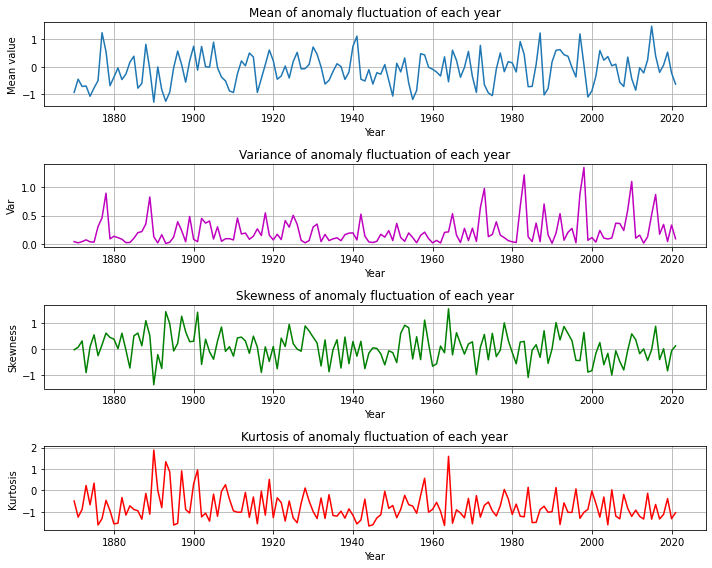

In [4]:

f, (ax1, ax2,ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10,8))


ax1.plot(list(data.index),Medias_no_Ano)
ax1.set(xlabel="Year", ylabel="Mean value")
ax1.set_title('Mean of anomaly fluctuation of each year')


ax2.plot(list(data.index),Var_no_Ano,color = 'm')
ax2.set(xlabel="Year", ylabel="Var")
ax2.set_title('Variance of anomaly fluctuation of each year')

ax3.plot(list(data.index),skew_no_Ano,color = 'g')
ax3.set(xlabel="Year", ylabel="Skewness")
ax3.set_title('Skewness of anomaly fluctuation of each year')

ax4.plot(list(data.index),Kurtosis_no_Ano,color = 'r')
ax4.set(xlabel="Year", ylabel="Kurtosis")
ax4.set_title('Kurtosis of anomaly fluctuation of each year')


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.tight_layout()
plt.show()


We can observe that the amplitude of variance becomes higher after 1970, it is just calling our attention to anomalous events in clime in the last years. 

### Anomaly values along of years (for months)

In this part of project we will setting or data like a time series, considering a very long time series that regards of year, only represented by months.

In [5]:
# List of anomaly values versus month

Serietemporal = []
for i in range(152):
    for j in range(1,12,1):
        Serietemporal.append(data.iloc[i,j])
        
# Series of the previous list 'Serietemporal'

s = pd.Series(Serietemporal)
s.describe()

count    1672.000000
mean       -0.107147
std         0.749137
min        -2.180000
25%        -0.630000
50%        -0.160000
75%         0.320000
max         2.570000
dtype: float64

In [6]:
s[:20].to_numpy()  
# You can see that after -0.79 we have -0.25, that are the end of row 0 and begin of row 1, repectivaly.
# See the rows 0 and 1 of dataframe.

array([-1.2 , -0.83, -0.81, -1.27, -1.08, -1.04, -0.88, -0.53, -0.92,
       -0.79, -0.79, -0.58, -0.43, -0.5 , -0.7 , -0.53, -0.6 , -0.33,
       -0.24, -0.33])

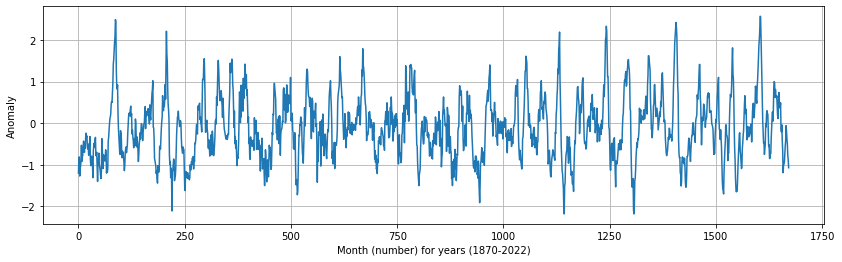

In [7]:
plt.figure(figsize=(14.0,4))

plt.ylabel("Anomaly", color = 'black')
plt.xlabel("Month (number) for years (1870-2022)", color = 'black')

s.plot()
plt.grid()

pyplot.show()

- The time series will be important to our future analysis.

Now we plot the histogram, which fits with the Normal distribution is good.

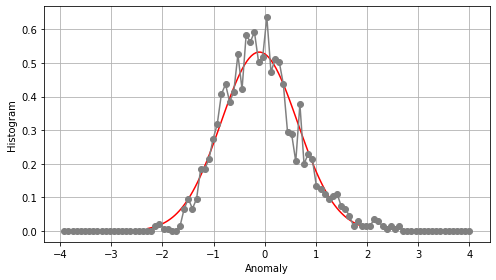

In [10]:
bins = np.linspace(-4,4, 100) # intervalo e número de bins 

plt.figure(figsize=(7.0,4))
x = np.linspace(-0.108200 - 3*(0.726045), -0.108200 + 3*(0.726045), 100)
plt.plot(x, stats.norm.pdf(x, -0.107147, 0.749137), color = 'r')
hist1t, _ = np.histogram(Serietemporal, bins=bins,density='True')
#plt.plot( bins[1:], hist1t )
plt.plot( bins[1:], hist1t , '-o',color = 'gray')
plt.yscale('linear')
plt.xscale('linear')
plt.ylabel("Histogram", color = 'black')
plt.xlabel("Anomaly", color = 'black')
plt.grid()
#plt.title('Histogram')
#plt.show()

plt.tight_layout()
#plt.savefig('Histogram.png') #With you want to save

- There is a good match between the histogram with normal PDF, it is an indicator that we do not have rare events (no extreme).


# Return map 

In [9]:
ArraySeries = pd.Series(s).array #list to array
Data_array = np.array(ArraySeries)
Data_array.shape

(1672,)

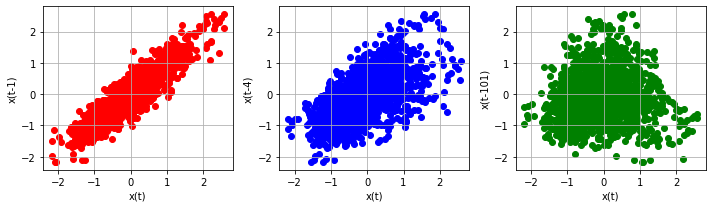

In [10]:
f, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10,3))

lag = 1
ax1.scatter(Data_array[:-lag],np.roll( Data_array, - lag)[:-lag].flatten() ,color = 'red')
ax1.set(xlabel='x(t)', ylabel='x(t-1)')

lag = 4
ax2.scatter(Data_array[:-lag],np.roll( Data_array, - lag)[:-lag].flatten() ,color = 'blue')
ax2.set(xlabel='x(t)', ylabel='x(t-4)')

lag = 10
ax3.scatter(Data_array[:-lag],np.roll( Data_array, - lag)[:-lag].flatten() ,color = 'green')
ax3.set(xlabel='x(t)', ylabel='x(t-101)')

ax1.grid()
ax2.grid()
ax3.grid()

plt.tight_layout()
plt.show()


Observation: The correlation between data after 4 months is lower but exist, then the duration of this event happens in months scale, it is an approximation.

# Autocorrelation function 

The autocorrelation_plot uses the following formula (except that it uses N instead of N-k):

$ R(\tau) = \frac{1}{(n-\tau)\sigma^2} \sum_{n=1}^{n-k} (X_t - \mu)(X_{t+\tau}-\mu)$

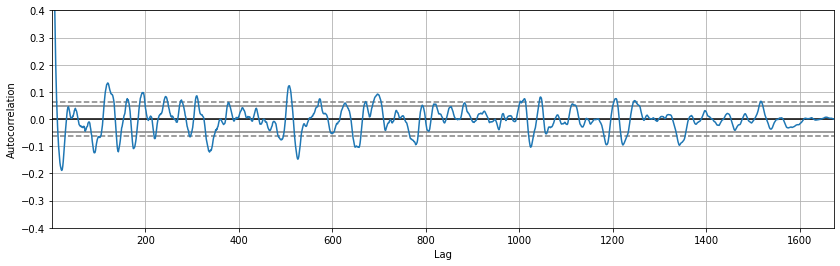

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(14.0,4))

s = pd.Series(Serietemporal)
autocorrelation_plot(s)

plt.ylim([-0.4, 0.4])

pyplot.show()
plt.tight_layout()

The horizontal lines in the plot correspond to 95% and 99% confidence bands.
The dashed line is 99% confidence band.

The maximum points correspond to high correlation values.

# Rolling windows
In this section, we will show you how to use the window function to calculate time series metrics for both rolling windows.
 
*Window functions are useful because they allow you to operate on sub-periods of your time series. In particular, window functions calculate metrics for the data inside the window. Then, the result of this calculation forms a new time series, where each data point represents a summary of several data points of the original time series. We will discuss two main types of windows: Rolling windows maintain the same size while they slide over the time series, so each new data point is the result of a given number of observations.*

In [12]:
# Offset-based window size
df = pd.DataFrame(s)

In [27]:
r12 = df.rolling(window=12,min_periods=1,center = True).mean().dropna()
r24 = df.rolling(window=24,min_periods=1, center = True).mean().dropna()
r48 = df.rolling(window=48,min_periods=1,center = True).mean().dropna()

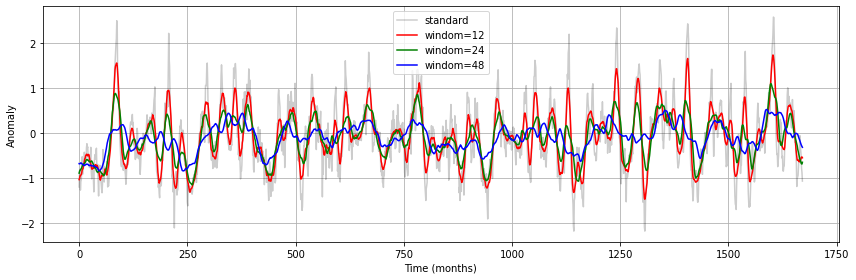

In [28]:
plt.figure(figsize=(12.0,4))

ax = plt.gca()

df.plot(y=0, ax=ax, color = 'black',alpha=0.2,  label='standard')
r12.plot(y=0, ax=ax, color='r',  label='windom=12')
r24.plot(y=0, ax=ax, color='g',  label='windom=24')
r48.plot(y=0, ax=ax, color='b',  label='windom=48')
plt.ylabel("Anomaly", color = 'black')
plt.xlabel("Time (months)", color = 'black')

plt.grid()

plt.savefig('Anomaly-Series.png',format="png")

plt.tight_layout()
plt.show()

plt.close()

In [29]:
Serietemporal12 = []
Serietemporal24 = []
Serietemporal48 = []
for i in range(len(r12)):
    Serietemporal12.append(r12.iloc[i,0])
for i in range(len(r24)):
    Serietemporal24.append(r24.iloc[i,0])
for i in range(len(r48)):
    Serietemporal48.append(r48.iloc[i,0])
s12 = pd.Series(Serietemporal12)
s24 = pd.Series(Serietemporal24)
s48 = pd.Series(Serietemporal48)

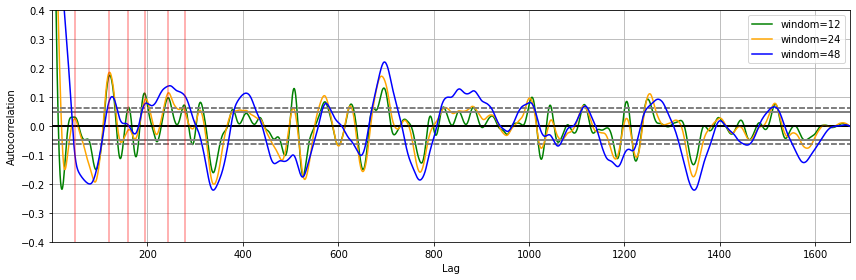

In [30]:
plt.figure(figsize=(12.0,4))


autocorrelation_plot(s12, color='g', label='windom=12')
autocorrelation_plot(s24, color='orange', label='windom=24')
autocorrelation_plot(s48, color='b',  label='windom=48')

### Ploting vertical  red lines
plt.ylim([-0.4, 0.4])
plt.axvline(48, 0, 1, label='pyplot vertical line', color='r', alpha=0.4) # 4 anos
plt.axvline(120, 0, 1, label='pyplot vertical line', color='r',alpha=0.4) # 10 anos depois
plt.axvline(160, 0, 1, label='pyplot vertical line', color='r', alpha=0.4) # 13 anos e 3 meses depois
plt.axvline(196, 0, 1, label='pyplot vertical line', color='r',alpha=0.4) # 16 anos e 3.3 meses depois
plt.axvline(196+48, 0, 1, label='pyplot vertical line', color='r',alpha=0.4) # 20 anos e 3.3 meses depois
plt.axvline(196+48+35, 0, 1, label='pyplot vertical line', color='r',alpha=0.4) # 23 anos e 2.5 meses depois
#plt.plot(autocorrelation/len(autocorrelation), color='g')

plt.savefig('AcfLag.png',format="png")

plt.tight_layout()
plt.show()

plt.close()


 We take the positions of picks in autocorrelation (when it is positive), and do the mean value among them.
 
 The heuristic result shows that 3.87 is the mean value between two el ninõ events.
 This number is not so bad, because the el ninõ event happens between 2 and 7 years.
 To improve our result we need to take all positive peaks that are higher than the solid horizontal line.  The peaks below the solid line show a correlation that has a white noise influence, so we don't have a sure. 

### Estimating the maximum values of autocorrelation

In [31]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf

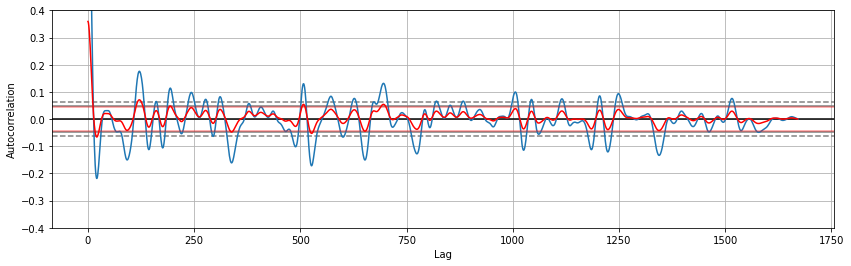

In [32]:
plt.figure(figsize=(14.0,4))
plt.ylim([-0.4, 0.4])

autocorrelation = np.correlate(s12, s12, mode="full") #np.correlate(list(df.iloc[:,0]), list(df.iloc[:,0]), mode="full")
autocorrelation = autocorrelation[autocorrelation.size//2:]

autocorrelation_plot(s12)
plt.plot(autocorrelation/len(autocorrelation),color='r')

plt.axhline(0.045, 0, 1, color='r', alpha=0.4) # 0.045 is an important value, representing 95% confidence bands.
plt.axhline(-0.045, 0, 1, color='r', alpha=0.4) # 


The list above represents the maximum values that are bigger than 0.045, representing a high correlation, it implies a time (years) between two events. 
##### Below we have the approximation of the time between two events:
 - First, obtain a list of maximum values (code below)
 - Second, we convert the len(series) in year and divide by len(list of maximums)-1. The result will be an approximation of the time interval between two events. Equation is $\sim \frac{1}{12}\frac{len(data)}{len(maximums)}$

In [35]:
data = s12 # We are using the s12 time series

List_auto_correlation = statsmodels.tsa.stattools.acf(data,  nlags=len(data))
list_max = []
list1 = []
y0=0
for i in range(len(List_auto_correlation)):
    if (List_auto_correlation[i] > 0.045) and (y0==0):
        list1.append(List_auto_correlation[i])
            #list_max.append()
        y0 = 0
    if (List_auto_correlation[i] <= 0.045) and (y0 ==0):
        y0 = 1
    if (List_auto_correlation[i] <= 0.045) and (y0 == 1) and (len(list1)>0):
        list_max.append(np.max(list1))
        list1 = []
    y0=0
list_max[:4]

[1.0, 0.045482713501765415, 0.1326599887517079, 0.07522514209020506]

In [34]:
(1/12)*len(s12)/(len(list_max)-1)  # FOR s12 (12 window of 12 month)

6.966666666666666

In [36]:
(1/12)*len(s)/(len(list_max)-1)  # FOR time series without rolling window

6.057971014492753

On the internet you will find:

*Episodes of El Niño and La Niña typically last nine to 12 months, but can sometimes last for years. El Niño and La Niña events occur every two to seven years, on average, but they don't occur on a regular schedule.*

 - We found ~ 6.9 years (~6.06 for the standard time series) by using auto_correlation. Despite a heuristic formulation, we found a good result, which agrees with the average reported by scientists in the field.

### Extra: Glancing for the maximums

In [37]:
List_auto_correlation = statsmodels.tsa.stattools.acf(s12,  nlags=len(s12))
list_maximums = []
list1 = []
y0=0
for i in range(len(List_auto_correlation)):
    if (List_auto_correlation[i] > 0.045) and (y0==0):
        list1.append(List_auto_correlation[i])
        list_maximums.append(0)
        y0 = 0
    if (List_auto_correlation[i] <= 0.045) and (y0 ==0):
        y0 = 1
    if (List_auto_correlation[i] <= 0.045) and (y0 == 1) and (len(list1)>0):
        list_maximums.append(np.max(list1))
        list1 = [0]
        y0=0

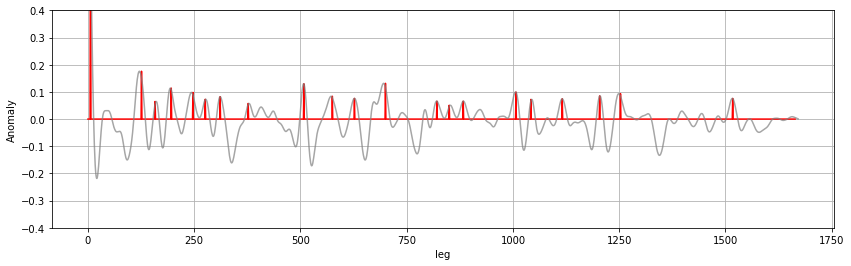

In [42]:
List_auto_correlation = statsmodels.tsa.stattools.acf(s12,  nlags=len(s12))

plt.figure(figsize=(14.0,4))
plt.ylim([-0.4, 0.4])

plt.plot(list_maximums[7:],color='r') ## There is some delay (shift) in series of maximum values!
plt.plot(List_auto_correlation,alpha=0.7,color='grey')


plt.ylabel("Anomaly", color = 'black')
plt.xlabel("leg", color = 'black')
plt.grid()

## Discussion and conclusion

In this project, we investigate a time series of El Niño events. First off, we prepare the data (removing the row with the error). We show some measures (e.g., mean, variance, etc) of el ninõs for different years. The first analyses show that there is a strange behavior for a variance in the last 20 years, is it connected to global warming? We do not have sure. 
 The second part of our project is to transform the data-frame of the year versus month in a long time series of months. In this part, we plot that return map with different lags, showing that for more than 4 months the el ninõs event lost correlation. We present the histogram, which reveal us that we do not have outliers.

In the last part, we were looking for the maximum correlation points of ACF. We start analyzing the time series we 'filter' (making the time series more smooth), to do that we use the rolling windows. We chose windows of 12, 24  & 48 months, these windows are multiples of years, so we check that 12 months maintain the features of the standard time series, and the other windows deform the original one.  But, why that? To answer our initial question on the estimation of maximum correlation values of El Niño events, glancing to the often. We show figures of the correlation with rolling windows. Taking the maximum values and doing some simple calculus we show that maximums of ACF occur each ~6.9 years. It is an indicator (maybe!) of the time scale between consecutive El Niño events. In the scientific  literature the interval between two El Niño phenomena occurs every two to seven years, on average. 